<a href="https://colab.research.google.com/github/erjank/563-a1/blob/main/lattice_mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
#HW4
import numpy
directions = [numpy.array((1,0)),numpy.array((0,-1)),numpy.array((-1,0)),numpy.array((0,1))]
def pbc(site,L): #The convention here is to have positive lattice indices
  for i,s in enumerate(site):
    if s >= L:
      site[i] = s - L
    elif s < 0:
      site[i] = s + L

class grid():
  def __init__(self,N=5,L=4,T=1.0):
    self.L = L
    self.N = N
    self.epsilon = -1
    self.kT = T
    self.particles = []
    for i in range(self.N):
      self.particles.append(particle())
      while True:
        rands = self.random_site()
        if not self.occupied(rands):
          self.particles[-1].location = rands
          break
    self.E = self.energy()

  def occupied(self,site):
    for p in self.particles:
      if numpy.array_equal(p.location,site):
        return True
    return False

  def random_site(self):
    return numpy.array((numpy.random.randint(self.L),numpy.random.randint(self.L)))

  def distance(self,site1,site2):
    return numpy.linalg.norm(site1-site2)

  def energy(self):
    energy = 0
    for p in self.particles:
      neighbors = p.get_neighbors()
      for n in neighbors:
        if self.occupied(n):
          energy += self.epsilon
    return energy/2

  def __repr__(self):
    m = numpy.zeros((self.L, self.L))
    for p in self.particles:
      m[tuple(p.location)] = 1
    return str(m)

class particle():
  def __init__(self):
    self.location = numpy.array((-1,-1)) #negative index means unplaced

  def get_neighbors(self):
    neighbors = []
    for d in directions:
      neighbors.append(d+self.location)
    return neighbors

class simulation():
  def __init__(self,N=5,L=3,T=1.,steps = 1000,seed=2):
    numpy.random.seed(seed)
    self.grid = grid(N,L,T)
    self.accepted = 0
    self.rejected = 0
    self.energies = numpy.zeros(steps)
    for i in range(steps):
      self.trial_move()
      self.energies[i] = self.grid.E/N
      if i%10000 == 0:
        print(i)
        print(self.grid.E)
        print(self.grid)

  def trial_move(self):
    p = numpy.random.choice(self.grid.particles)
    old = p.location
    oldE = self.grid.E
    trial = self.grid.random_site()
    if not self.grid.occupied(trial):
      p.location = trial
      E = self.grid.energy()
      dE = E - oldE
      if numpy.random.rand() < numpy.exp(-dE/self.grid.kT):
        self.grid.E = E
        self.accepted += 1
      else:
        p.location = old
        self.grid.E = oldE
        self.rejected += 1


0
-11.0
[[1. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]]
10000
-16.0
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1.]
 [0. 0. 0. 1. 1. 1. 0. 1.]]
20000
-17.0
[[0. 0. 0. 1. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 1. 1. 1. 1. 0.]
 [0. 1. 1. 0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0. 0. 0. 0.]]
30000
-19.0
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0.]
 [1. 1. 0. 0. 1. 0. 0. 0.]]
40000
-17.0
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0.

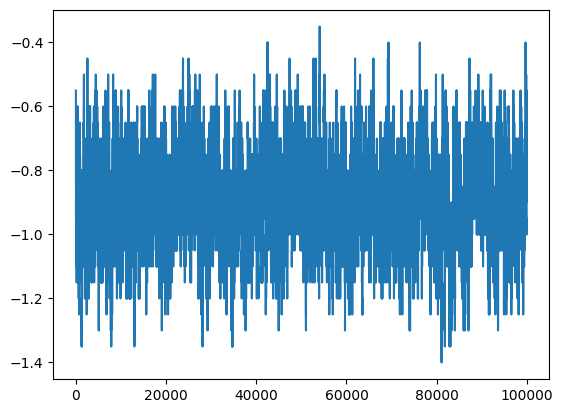

In [29]:
import matplotlib.pyplot as plt
s = simulation(N=20,L=8,T=0.9,steps=100000, seed = 3)
plt.plot(s.energies)